# Practice : computing simple regression parameters (closed form example)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## data

In [6]:
X = np.array([0,1,2,3,4]) # inputs
Y = np.array([1,3,7,13,21]) # outputs
print(X)
print(Y)

[0 1 2 3 4]
[ 1  3  7 13 21]


## data plot

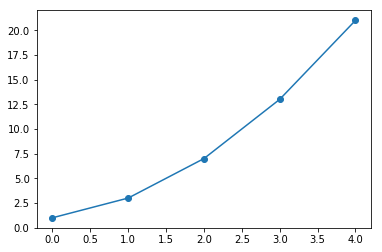

In [11]:
plt.scatter(X,Y)
plt.plot(X,Y)

## Model that fit the data
Since we just have one input, we can assume that our model is linear. $Y=w_0 + w_1X$ with error $\epsilon$ <br>
where $w_0$ is the intercept and $w_1$ the slope <br>
the error $\epsilon$ represent the difference between the reel output $Y_i$ and the extimate output $\hat{Y_i}$ $\epsilon = Y_i - \hat{Y_i}(\hat{w_0},\hat{w_1})$: <br>
for a data $X_i$, we have $Y_i= \hat{w_0} + \hat{w_1}X_i + \epsilon_i$

## How to find the best line which fit our training data ? : an optimization problem
This line is the one that minimize the error on each training data. Let us us the $\textbf{Residual Sum of Square} (RSS)$ method to estimate the paramters $\hat{w_0}$ and $\hat{w_1}$ of that line. <br>
So we have to fine $w_0$ and $w_1$ such that : $\min(RSS(w_0,w_1)=\sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i])^2)$ <br>
Since this RSS function is convex, the have a minimun and we have to deduce the parameter at this points.

## Gradient descent algorithm
Let $f(w_0,w_1)=RSS(w_0,w_1)=\sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i])^2$ <br>
this function reach thier minimun value when $f'(w_,w_0$. So the optimal (best) parameter of $f$ are obtain for solving $f'(w_0,w_1)=0$ <br>
since $f$ is a function of two variable we talk about gradient and $ f'(w_0,w_1)= \nabla f(w_0,w_1)  = \left[ \frac{\partial f}{\partial w_0}, \frac{\partial f}{\partial w_1} \right]$ <br>


### parameter estimation
We have : <br>
$\nabla f(w_0,w_1)=0 \Rightarrow \left[ -2 \sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i]), -2 \sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i])X_i \right] =0 \tag{1}$ <br>
$\frac{\partial f}{\partial w_0} = -2 \sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i]) = 0 \tag{2}$ <br>
$\frac{\partial f}{\partial w_1} = -2 \sum_{i=1}^{N} (Y_i - [w_0 + w_1 X_i])X_i = 0 \tag{3}$ <br>

After a lot of work, solving $(2)$ and $(3)$ for $w_0$ and $w_1$ we obtain : <br>
$\hat{w_0}= \left[ \frac{\sum_{i=1}^{N}Y_i}{N} - \hat{w_1} \frac{\sum_{i=1}^{N}X_i}{N}  \right] \tag{4}$ <br> 
and <br>
$ \hat{w_1} = \left[ \frac{\sum_{i=1}^{N}X_i Y_i- \frac{\sum_{i=1}^{N}X_i \sum_{i=1}^{N}Y_i}{N}}{\sum_{i=1}^{N}X^2_i - \frac{\sum_{i=1}^{N}X_i \sum_{i=1}^{N}X_i}{N}} \right] \tag{5}$

## Parameters computation

In [68]:
N = X.size
# estimate w_1
Xsum = X.sum(); print('Sum X = ',Xsum)
Ysum = Y.sum(); print('Sum Y = ',Ysum)
XYsum = (X*Y).sum(); print('Sum X*Y = ', XYsum)
XXsum = (X*X).sum()
XsumXsum = Xsum*Xsum; print('Sum X*X = ', XsumXsum)
XsumYsum = (Xsum)*(Ysum)

num = (XYsum - ((Xsum)*(Ysum))/N); print('Num = ',num)
den = (XXsum) - ((XsumXsum)/N); print('den = ',den)
w1 = (num)/(den)
print('slope W_1 = ', w1)

Sum X =  10
Sum Y =  45
Sum X*Y =  140
Sum X*X =  100
Num =  50.0
den =  10.0
slope W_1 =  5.0


In [69]:
# intercept
w0 = (Ysum)/N - w1*((Xsum)/N)
print('intercept w_0 = ', w0)

intercept w_0 =  -1.0


# plot 

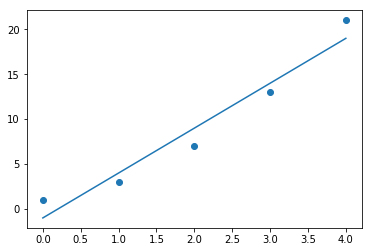

In [79]:
prediction = w0 + w1*X
plt.scatter(X,Y)
plt.plot(X,prediction)